# Logistic Regression


## In this notebook, we will perform logistic regression and then evaluate the model's performance.

### Import necessary packages

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

### Load the data

In [149]:
train_data = pd.read_csv('data/train.csv')
val_data = pd.read_csv('data/val.csv')
test_data = pd.read_csv('data/test.csv')

### 95% Confidence interval for all model parameters

In [150]:
for i in np.arange(32):
       print(train_data.columns[i],':',st.norm.interval(alpha = 0.95,loc = np.mean(train_data.iloc[:,i]),scale = st.sem(train_data.iloc[:,i])))

id : (16349960.551411724, 38908415.50040174)
diagnosis : (0.3197064395276745, 0.416044855809113)
radius_mean : (13.762062577148765, 14.485471101607708)
texture_mean : (18.77658779332466, 19.65304951237482)
perimeter_mean : (89.45223985280859, 94.43392595030022)
area_mean : (619.8389307595313, 692.0470796031631)
smoothness_mean : (0.09537352754442716, 0.09828434810324124)
compactness_mean : (0.09945527489443516, 0.10997659039053893)
concavity_mean : (0.0812042744841804, 0.09715813846918751)
concave points_mean : (0.045398640980119156, 0.053378384926616604)
symmetry_mean : (0.17829038051035162, 0.18386609617358618)
fractal_dimension_mean : (0.062264416675564545, 0.06370895120008313)
radius_se : (0.3803731906571351, 0.4355599699646266)
texture_se : (1.1539724153230249, 1.2664814706873377)
perimeter_se : (2.6800714074438456, 3.0781892143178124)
area_se : (35.91303984470642, 44.593001606070786)
smoothness_se : (0.006756038608940154, 0.0073911220128215025)
compactness_se : (0.024001024749753

### Preparing for training,validation and testing

In [151]:
X_train = train_data.drop(labels = ['diagnosis','id'],axis = 1) # drop labels and less predictive features for feature matrix
y_train = train_data['diagnosis']
X_val = val_data.drop(labels = ['diagnosis','id'],axis = 1)
y_val = val_data['diagnosis']
X_test = test_data.drop(labels = ['diagnosis','id'],axis = 1)
y_test = test_data['diagnosis']

### Built the model, train and validate

In [152]:
model = LogisticRegression(max_iter = 5000)
model.fit(X_train,y_train)
y_preds = model.predict(X_val)
accuracy_score(y_preds,y_val)

0.9278350515463918

### Test the model

In [153]:
y_preds_test = model.predict(X_test)
accuracy_score(y_preds_test,y_test)

0.9651162790697675

### Creating confusion matrix for the test data

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


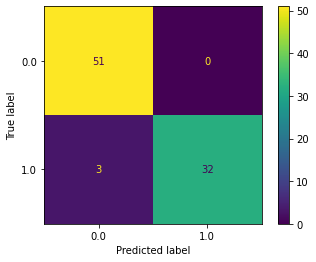

In [154]:
confusion_matrix = plot_confusion_matrix(model,X_test,y_test);
plt.savefig('figures/confusion_matrix.png')

### Create the ROC Curve and Saving it

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


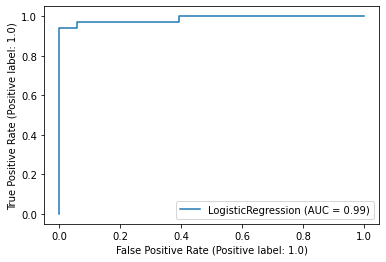

In [155]:
plot_roc_curve(model,X_test,y_test);
plt.savefig('figures/roc_curve');

### Create Precision Recall Curve and Saving it

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


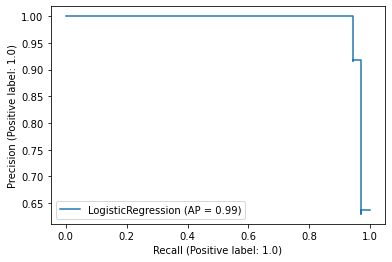

In [156]:
plot_precision_recall_curve(model,X_test,y_test);
plt.savefig('figures/precision_recall_curve');